In [20]:
from keras.datasets import reuters
from keras import models, layers, optimizers
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [8]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [16]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [69]:
y_train_ohe = to_one_hot(y_train)
y_test_ohe = to_one_hot(y_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [66]:
def build_model_1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(46,activation='softmax'))
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [45]:
X_val = X_train[:1000]
p_X_train = X_train[1000:]
y_val = y_train_ohe[:1000]
p_y_train = y_train_ohe[1000:]

In [46]:
model = build_model_1()

In [48]:
history = model.fit(p_X_train, p_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 117us/step - loss: 2.7418 - acc: 0.5013 - val_loss: 1.8187 - val_acc: 0.6140
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.4615 - acc: 0.6963 - val_loss: 1.3520 - val_acc: 0.7050
Epoch 3/20
7982/7982 [==============================] - 1s 76us/step - loss: 1.0709 - acc: 0.7751 - val_loss: 1.1660 - val_acc: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8426 - acc: 0.8235 - val_loss: 1.0506 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.6775 - acc: 0.8582 - val_loss: 0.9767 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.5409 - acc: 0.8865 - val_loss: 0.9386 - val_acc: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 77us/step - loss: 0.4333 - acc: 0.9095 - val_loss: 0.9530 - val_acc: 0.7910
Epoch 

In [27]:
def plot_train_val_loss(history_dict, ax):
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)
    ax.plot(epochs, loss_values,  'bo', label='Training Loss')
    ax.plot(epochs, val_loss_values, 'b', label='Validation Loss')
    ax.set_title('Training and Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()



def plot_train_val_metric(history_dict, ax, metric='accuracy'):
    acc_values = history_dict[metric]
    val_acc_values = history_dict[f'val_{metric}']
    epochs = list(range(1, len(acc_values)+1))
    ax.plot(epochs, acc_values, 'bo', label=f'Training {metric}')
    ax.plot(epochs, val_acc_values, 'b', label=f'Validation {metric}')
    ax.set_title(f'Training and Validation {metric}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(f'{metric}')
    ax.legend()

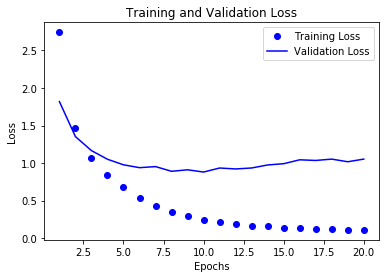

In [49]:
history_dict = history.history
fig, ax = plt.subplots()
plot_train_val_loss(history_dict, ax)
plt.show()

<Figure size 432x288 with 0 Axes>

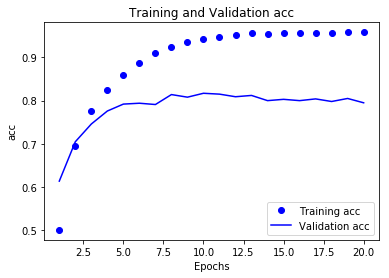

In [50]:
plt.clf()
fig, ax = plt.subplots()
plot_train_val_metric(history_dict, ax, 'acc')
plt.show()

In [67]:
#Train a new model for 9 epochs
model = build_model_1()

In [70]:
history = model.fit(p_X_train, y_train[1000:], epochs=20, batch_size=512, validation_data=(X_val, y_train[:1000]))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 115us/step - loss: 3.5791 - acc: 0.0462 - val_loss: 3.3149 - val_acc: 0.0640
Epoch 2/20
7982/7982 [==============================] - 1s 77us/step - loss: 3.0610 - acc: 0.1715 - val_loss: 2.8998 - val_acc: 0.3730
Epoch 3/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.5863 - acc: 0.4877 - val_loss: 2.4726 - val_acc: 0.5620
Epoch 4/20
7982/7982 [==============================] - 1s 75us/step - loss: 2.1363 - acc: 0.5996 - val_loss: 2.1099 - val_acc: 0.5980
Epoch 5/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.8000 - acc: 0.6139 - val_loss: 1.8798 - val_acc: 0.6010
Epoch 6/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.5892 - acc: 0.6336 - val_loss: 1.7455 - val_acc: 0.6180
Epoch 7/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.4538 - acc: 0.6511 - val_loss: 1.6736 - val_acc: 0.6220
Epoch 

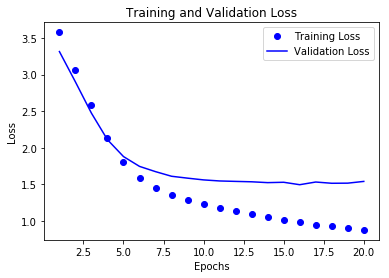

In [71]:
history_dict = history.history
fig, ax = plt.subplots()
plot_train_val_loss(history_dict, ax)
plt.show()

In [58]:
model.evaluate(X_test, y_test_ohe)

2246/2246 [==============================] - 0s 69us/step


[1.591818481073354, 0.6117542297948394]

In [59]:
predictions = model.predict(X_test[:5])

In [60]:
predictions[0].argmax()

3